In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
cd MyDrive/MyDrive/deepLearning/dataset

/content/MyDrive/MyDrive/deepLearning/dataset


In [3]:
import os
import pandas as pd
# Use local data file or download from GitHub
docker_data_path = "/home/h2o/data/nlp/stopwords.csv"
if os.path.isfile(docker_data_path):
    data_path = docker_data_path
else:
    data_path = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/h2o-world-2017/nlp/stopwords.csv"

STOP_WORDS = pd.read_csv(data_path, header=0)
STOP_WORDS = list(STOP_WORDS['STOP_WORD'])

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
anx = pd.read_csv('anx_c.csv')
bi = pd.read_csv('bi_c.csv')
sch = pd.read_csv('sch_c.csv')
adhd = pd.read_csv('adhd_c.csv')
dep = pd.read_csv('dep_c.csv')
nonM = pd.read_csv('nonM_c.csv')

In [8]:
anx = anx.dropna(how = 'any')
bi = bi.dropna(how='any')
sch = sch.dropna(how='any')
adhd = adhd.dropna(how='any')
dep = dep.dropna(how='any')
nonM = nonM.dropna(how='any')

In [9]:
minimum = min(len(bi),len(nonM),len(anx),len(adhd),len(dep),len(sch))
minimum

13155

In [10]:
dep_s = dep.sample(n = minimum,random_state = 1)
nonM_s = nonM.sample(n = minimum,random_state = 1)
anx_s = anx.sample(n = minimum,random_state = 1)
sch_s = sch.sample(n = minimum,random_state = 1)
bi_s = bi.sample(n = minimum,random_state = 1)
adhd_s = adhd.sample(n = minimum,random_state = 1)

In [11]:
data = pd.concat([dep_s[['content','class']],
                  nonM_s[['content','class']],
                  anx_s[['content','class']],
                  bi_s[['content','class']],
                  sch_s[['content','class']],
                  adhd_s[['content','class']]])

In [12]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.3,random_state=1,stratify = data['class'])
valid,test = train_test_split(test,test_size=2/3,random_state=1,stratify=test['class'])
print(len(train))
print(len(test))

print(train.groupby('class').count())
print(valid.groupby('class').count())
print(test.groupby('class').count())

55251
15786
       content
class         
adhd      9208
anx       9209
bi        9209
dep       9208
nonM      9209
sch       9208
       content
class         
adhd      1316
anx       1315
bi        1315
dep       1316
nonM      1315
sch       1316
       content
class         
adhd      2631
anx       2631
bi        2631
dep       2631
nonM      2631
sch       2631


In [13]:
from nltk.tokenize import word_tokenize
x_train = []
for i in train['content'].values:
  tok = word_tokenize(i)
  for i in STOP_WORDS:
    if i in tok:
        tok.remove(i)
  x_train.append(tok)

x_valid = []
for i in valid['content'].values:
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_valid.append(tok)
    
x_test = []
for i in test['content'].values:
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_test.append(tok)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

y_train = train['class'].values
y_valid = valid['class'].values
y_test = test['class'].values
#convert = {"nonM":0,"dep":1,"anx":2,"bi":3,'adhd':4,'sch':5}
convert = {"adhd":0,"anx":1,"bi":2,"dep":3,"nonM":4,"sch":5}
y_train_l = []
for i in y_train:
  y_train_l.append(convert[i])

y_valid_l = []
for i in y_valid:
  y_valid_l.append(convert[i])

    
y_test_l = []
for i in y_test:
  y_test_l.append(convert[i])

y_train_l = to_categorical(y_train_l) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_valid_l = to_categorical(y_valid_l)
y_test_l = to_categorical(y_test_l) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [16]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 71089
등장 빈도가 1번 이하인 희귀 단어의 수: 34306
단어 집합에서 희귀 단어의 비율: 48.25781766518027
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3484953070565068


In [17]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 36785


In [18]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
X_valid = tokenizer.texts_to_sequences(x_valid)
X_test = tokenizer.texts_to_sequences(x_test)

In [19]:
len(tokenizer.word_index)

71090

In [20]:
from gensim.models import Word2Vec
model = Word2Vec(x_train, min_count = 1, size = 128, window = 5, sg = 1)

In [21]:
embedding_matrix = np.zeros((vocab_size, 128))

In [22]:
def get_vector(word):
    if word in model:
        return model[word]
    else:
        return None
 
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    if i> vocab_size-1:
      pass
    else:
      temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
      if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
embedding_matrix.shape

(36785, 128)

content의 최대 길이 : 7225
content의 평균 길이 : 178.1693544008253


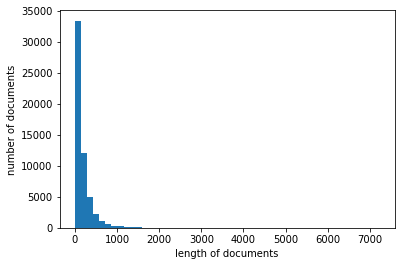

In [24]:
print('content의 최대 길이 :',max(len(l) for l in X_train))
print('content의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of documents')
plt.ylabel('number of documents')
plt.show()

In [25]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
    
max_len = 512
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 512 이하인 샘플의 비율: 93.63088450887767


In [26]:
X_train_p = pad_sequences(X_train, maxlen = max_len)
X_test_p = pad_sequences(X_test, maxlen = max_len)
X_valid_p = pad_sequences(X_valid,maxlen = max_len)

In [31]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 128,weights = [embedding_matrix],trainable=False))
model.add(Bidirectional(LSTM(128,return_sequences = True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(6, activation='softmax'))

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_bi_w.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
history = model.fit(X_train_p,
                    y_train_l, 
                    epochs=30, 
                    callbacks=[es, mc], 
                    batch_size=256,
                    validation_data = (X_valid_p,y_valid_l))

Epoch 1/30
216/216 [==============================] - 150s 666ms/step - loss: 1.5080 - acc: 0.3943 - val_loss: 1.3277 - val_acc: 0.4984

Epoch 00001: val_acc improved from -inf to 0.49842, saving model to best_model_bi_w.h5
Epoch 2/30
216/216 [==============================] - 142s 658ms/step - loss: 1.3542 - acc: 0.4843 - val_loss: 1.0941 - val_acc: 0.6007

Epoch 00002: val_acc improved from 0.49842 to 0.60066, saving model to best_model_bi_w.h5
Epoch 3/30
216/216 [==============================] - 143s 661ms/step - loss: 0.8647 - acc: 0.6959 - val_loss: 0.7214 - val_acc: 0.7657

Epoch 00003: val_acc improved from 0.60066 to 0.76574, saving model to best_model_bi_w.h5
Epoch 4/30
216/216 [==============================] - 143s 661ms/step - loss: 0.6708 - acc: 0.7792 - val_loss: 0.6162 - val_acc: 0.7934

Epoch 00004: val_acc improved from 0.76574 to 0.79336, saving model to best_model_bi_w.h5
Epoch 5/30
216/216 [==============================] - 143s 660ms/step - loss: 0.5768 - acc: 0.8

In [35]:
loaded_model = load_model('best_model_bi_w.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_p, y_test_l)[1]))

494/494 [==============================] - 65s 126ms/step - loss: 0.4670 - acc: 0.8445

 테스트 정확도: 0.8445


In [36]:
from sklearn.metrics import classification_report
result = np.array(loaded_model.predict(X_test_p)).tolist()
test_label = [np.argmax(i) for i in y_test_l]
predict_label = [np.argmax(i) for i in result]
target_names = ['nonM', 'dep', 'anx','bi','adhd','sch']
print(classification_report(test_label, predict_label, target_names=target_names))

              precision    recall  f1-score   support

        nonM       0.91      0.88      0.89      2631
         dep       0.84      0.83      0.84      2631
         anx       0.84      0.79      0.81      2631
          bi       0.76      0.82      0.79      2631
        adhd       0.88      0.94      0.91      2631
         sch       0.85      0.80      0.83      2631

    accuracy                           0.84     15786
   macro avg       0.85      0.84      0.84     15786
weighted avg       0.85      0.84      0.84     15786

